## Callin Switzer
## Run simulations  for path

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import seaborn as sns
from scipy.integrate import odeint
import random
import time
from datetime import datetime
import sys
import pandas as pd
import multiProcTraj # note that this is a custom-written file 

pd.set_option('display.max_columns', 500)

# define directories
baseDir = os.getcwd()
dataDir = r'D:\MothSimulations\11c-AggressiveManeuver\Qstore\hws_am_con'
figDir = r'D:\Dropbox\AcademiaDropbox\mothMachineLearning_dataAndFigs\Figs'
dataOutput = r'D:\Dropbox\AcademiaDropbox\mothMachineLearning_dataAndFigs\DataOutput'
savedModels = r'D:\Dropbox\AcademiaDropbox\mothMachineLearning_dataAndFigs\savedModels'
randomRawData = r'D:/Dropbox/AcademiaDropbox/mothMachineLearning_dataAndFigs/PythonGeneratedData'

if not os.path.exists(dataOutput):
    os.mkdir(dataOutput)
if not os.path.exists(savedModels):
    os.mkdir(savedModels)

print(sys.version)
now = datetime.now()
print("last run on " + str(now))

3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]
last run on 2019-01-02 14:14:37.445268


In [16]:
# Load data
pathDF = pd.read_csv(os.path.join(dataOutput, "PredictedTraj2_feed.csv"))
pathDF.shape

(200, 23)

In [17]:


pathDF.tail()


,x_0,y_0,phi_0,theta_0,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0,F_pred,alpha_pred,tau_pred,x_99,y_99,phi_99,theta_99,x_dot_99_pred,y_dot_99_pred,phi_dot_99_pred,theta_dot_99_pred,Fx_pred,Fy_pred,quadrant,tsteps
195,0.0,0.0,3.926991,0.785398,0.000001,38.832221,0,0,2928.986445,0.989029,-391.046722,0,1.067286,3.926991,0.785398,-22.500629,112.718925,-0.156983,-0.264036,1609.481934,2447.147217,1,3.90
196,0.0,0.0,3.926991,0.785398,0.000001,67.333981,0,0,2759.188085,0.995642,-350.035431,0,1.597808,3.926991,0.785398,-22.332081,139.266647,-0.165872,-0.268434,1500.899780,2315.257812,1,3.92
197,0.0,0.0,3.926991,0.785398,0.000001,91.604899,0,0,2505.744202,1.008256,-321.274933,0,2.027934,3.926991,0.785398,-22.207941,159.611984,-0.174110,-0.271921,1336.405273,2119.616699,1,3.94
198,0.0,0.0,3.926991,0.785398,0.000001,110.119945,0,0,2185.274540,1.029322,-306.486115,0,2.330638,3.926991,0.785398,-22.133829,172.478394,-0.181177,-0.274251,1126.290527,1872.670410,1,3.96
199,0.0,0.0,3.926991,0.785398,0.000001,121.715750,0,0,1819.191532,1.063479,-306.682068,0,2.486899,3.926991,0.785398,-22.110157,177.063324,-0.186556,-0.275331,883.826111,1590.065796,1,3.98


___

# Loop Version 

In [18]:
# put data into correct order
# x,xd,y,yd,
# theta,thetad,phi,phid, 
# F, alpha, tau0


tic = time.time()
t = np.linspace(0, 0.02, num = 100, endpoint = False) # time cut into 100 timesteps
nrun = pathDF.shape[0]  #number of trajectories.

# pre-allocate arrays to fill
nstep = 100
zeroMatrix = np.zeros([nrun, nstep])
x,      xd,    y,   yd, \
theta, thetad, phi, phid = [zeroMatrix.copy() for ii in 
                                range(len([ "x",     "xd",     "y", "yd", 
                                            "theta", "thetad", "phi", "phid"]))]

# generate  initial conditions for state 0
state01 = np.array(pathDF[["x_0", "x_dot_0", "y_0", "y_dot_0", 
           "theta_0", "theta_dot_0", "phi_0", "phi_dot_0", 
           "F_pred", "alpha_pred", "tau_pred"]])

# loop through all the runs
for i in range(0,nrun):
    # run ODE
    state = odeint(multiProcTraj.FlyTheBug, state01[i, :], t)
    x[i,:], xd[i,:] = state[:,0], state[:,1]
    y[i,:], yd[i, :] = state[:,2], state[:,3]
    theta[i,:], thetad[i, :] = state[:,4],state[:,5]
    phi[i,:], phid[i, :] = state[:, 6], state[:,7]
    
    if(np.mod(i, 1000) == 0):
        print(i)
        print('elapsed time = ',time.time()-tic)
print('elapsed time = ',time.time()-tic)

0
elapsed time =  0.01994633674621582
elapsed time =  3.486380100250244


In [19]:
x.shape

(200, 100)

In [20]:
state01.shape

(200, 11)

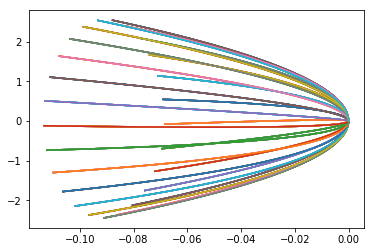

In [21]:
plt.figure()
for i in range(0,nrun):
    plt.plot(x[i, :],y[i, :], label = 'trajectory x vs y')

In [22]:
# get errors and correct with nnet

In [23]:
# get final states
x_f_sim = x[:, -1]
xd_f_sim = xd[:, -1]

y_f_sim = y[:, -1]
yd_f_sim = yd[:, -1]

theta_f_sim = theta[:, -1]
thetad_f_sim = thetad[:, -1]

phi_f_sim = phi[:, -1]
phid_f_sim = phid[:, -1]

In [24]:
pathDF["x_99_actual"] = x_f_sim
pathDF["xd_99_actual"] = xd_f_sim
pathDF["y_99_actual"] = y_f_sim
pathDF["yd_99_actual"] = yd_f_sim
pathDF["theta_99_actual"] = theta_f_sim
pathDF["thetad_99_actual"] = thetad_f_sim
pathDF["phi_99_actual"] = phi_f_sim
pathDF["phid_99_actual"] = phid_f_sim



pathDF.head()

,x_0,y_0,phi_0,theta_0,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0,F_pred,alpha_pred,tau_pred,x_99,y_99,phi_99,theta_99,x_dot_99_pred,y_dot_99_pred,phi_dot_99_pred,theta_dot_99_pred,Fx_pred,Fy_pred,quadrant,tsteps,x_99_actual,xd_99_actual,y_99_actual,yd_99_actual,theta_99_actual,thetad_99_actual,phi_99_actual,phid_99_actual
0,0.0,0.0,3.926991,0.785398,0.000001,125.663706,0,0,1432.744547,1.119976,-321.818451,0,2.486899,3.926991,0.785398,-22.135920,173.082687,-0.189894,-0.275100,624.252136,1289.599243,1,0.00,-0.087800,-8.993559,2.544456,131.379402,0.789095,0.398616,3.931326,0.431273
1,0.0,0.0,3.926991,0.785398,0.000001,121.715750,0,0,1054.857548,1.218496,-350.956696,0,2.330638,3.926991,0.785398,-22.208017,160.787750,-0.190977,-0.273578,363.986359,990.069885,1,0.02,-0.082601,-8.437637,2.393166,120.024120,0.788153,0.302559,3.930382,0.335130
2,0.0,0.0,3.926991,0.785398,0.000001,110.119945,0,0,720.155435,1.404157,-392.329529,0,2.027934,3.926991,0.785398,-22.322237,140.949417,-0.189717,-0.270872,119.451866,710.179626,1,0.04,-0.077934,-7.937957,2.095135,101.492596,0.787241,0.210368,3.929489,0.243891
3,0.0,0.0,3.926991,0.785398,0.000001,91.604899,0,0,476.758957,1.769239,-443.292358,0,1.597808,3.926991,0.785398,-22.474615,114.808495,-0.186243,-0.267093,-93.989716,467.402435,2,0.06,-0.074020,-7.515376,1.669001,76.937882,0.786420,0.128126,3.928706,0.163564
4,0.0,0.0,3.926991,0.785398,0.000001,67.333981,0,0,381.768676,2.330324,-500.684509,0,1.067286,3.926991,0.785398,-22.657322,84.003555,-0.180822,-0.262525,-262.877808,276.843964,2,0.08,-0.070948,-7.173721,1.141480,47.896552,0.785745,0.061338,3.928086,0.099517


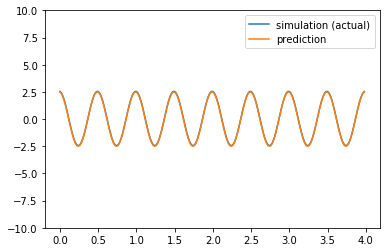

In [25]:
plt.plot(pathDF.tsteps, y_f_sim, label = "simulation (actual)")
plt.plot(pathDF.tsteps,pathDF.y_99, label = "prediction")
plt.ylim(-10, 10)
plt.legend()

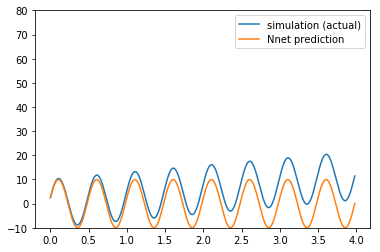

In [26]:
plt.plot(pathDF.tsteps, np.cumsum(y_f_sim), label = "simulation (actual)")
plt.plot(pathDF.tsteps,np.cumsum(pathDF.y_99), label = "Nnet prediction")
plt.ylim(-10, 80)
plt.legend()

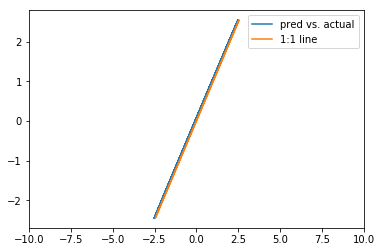

In [27]:
# plot residuals
plt.plot(pathDF.y_99, pathDF.y_99_actual, label = 'pred vs. actual')
plt.plot(pathDF.y_99_actual, pathDF.y_99_actual, label = "1:1 line")
plt.xlim(-10, 10)
plt.legend()
plt.show()

In [28]:
pathDF.to_csv(os.path.join(dataOutput, "PathGraphic_feed.csv"), index = False)

In [ ]:
combDF = testDF.head(100000).copy()

In [ ]:
combDF = combDF.assign(x_99_sim = x_f_sim, 
                      y_99_sim = y_f_sim, 
                      theta_99_sim = theta_f_sim, 
                      phi_99_sim = phi_f_sim, 
                      xd_99_sim = xd_f_sim, 
                      yd_99_sim = yd_f_sim, 
                      thetad_99_sim = thetad_f_sim, 
                      phid_99_sim = phid_f_sim) 

In [ ]:
combDF.head()

In [ ]:
combDF.to_csv(os.path.join(dataOutput, "SimVsNNet_Locations_100K.csv"), index = False)

___

# parallel version

The data is read in in multiProcTraj.py

In [ ]:
# put data into correct order
# x,xd,y,yd,
# theta,thetad,phi,phid, 
# F, alpha, tau0

nrun = 1000000

tic = time.time()
# loop through all the runs

p = Pool(cpu_count()-3)
stt = time.time()   
bb = p.map(multiProcTraj.flyBug_firstLast_test, range(nrun) ) 
print(time.time() -stt)

p.close()
p.join()
print(time.time() -stt)
newDF = pd.DataFrame(bb, columns= ["x0", "x_99_sim", "xd0", "xd_99_sim", "y0", "y_99_sim", "yd0", "yd_99_sim", "theta0", \
        "theta_99_sim", "thetad0", "thetad_99_sim", "phi0", "phi_99_sim", "phid0", "phid_99_sim", "F", "alpha", "tau0"])
print('elapsed time = ',time.time()-tic)

In [ ]:
print(newDF.shape)

newDF.head()

In [ ]:
# align newDF with old DF
testDF.head()

In [ ]:
combDF = newDF.merge(testDF.head(nrun), left_on=["F", "alpha", "tau0"], right_on=["F_pred", "alpha_pred", "tau_pred"])

In [ ]:
print(combDF.shape)
combDF.head()

In [ ]:
# save combined DF
combDF.to_csv(os.path.join(dataOutput, "SimVsNNet_Locations_Full.csv"), index = False)